In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_and_process(url_or_path_to_csv_file):

    df1 =  (
        pd.read_csv(url_or_path_to_csv_file)
        .rename(columns = {"instant":"Index", "dteday":"Date","season":"Season","yr":"Year","mnth":"Month","hr":"Hour","holiday":"Holiday","weekday":"Week_day","workingday":"Working_day",
                            "weathersit":"Weather","temp":"Temperature","atemp":"FeelTemp","hum":"Humidity","windspeed":"Wind_speed","casual":"Casual_users","registered":"Registered_users",
                            "cnt": "Total_users"}, errors = "ignore")
        .dropna(axis=0, how='any')
        .sort_values(["Index", "Date"])
        .sort_values('Date', ascending=True)
        .drop(columns = "Index", errors = "ignore")

      )

    df2 = (
        df1
        .assign(Average_Temp = lambda x : (x['FeelTemp'] + x['Temperature']) / 2)
        .assign(Casual_ratio = lambda x : x['Casual_users'] / x['Total_users'])
        .assign(Registered_ratio = lambda x : x['Registered_users'] / x['Total_users'])
      )
    
    # Replacing weekdays in column week_day
    df2['Week_day'] = df2['Week_day'].replace([0,1,2,3,4,5,6],["Sun","Mon","Tue","We","Thu","Fri","Sat"])
    # Replacing weather conditions in column weather
    df2['Weather'] = df2['Weather'].replace([1,2,3,4],["Sunny/Clear","Cloudy/Foggy","Rainy/Snowy","Severe Conditions"])
    # Replacing season in column season
    df2['Season'] = df2['Season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])

    print(df2.shape)
    print(df2.nunique(axis=0))
    
      
    return df2

In [4]:
load_and_process('../day.csv')

(731, 18)
Date                731
Season                4
Year                  2
Month                12
Holiday               2
Week_day              7
Working_day           2
Weather               3
Temperature         499
FeelTemp            690
Humidity            595
Wind_speed          650
Casual_users        606
Registered_users    679
Total_users         696
Average_Temp        729
Casual_ratio        729
Registered_ratio    729
dtype: int64


,Date,Season,Year,Month,Holiday,Week_day,Working_day,Weather,Temperature,FeelTemp,Humidity,Wind_speed,Casual_users,Registered_users,Total_users,Average_Temp,Casual_ratio,Registered_ratio
0,2011-01-01,Spring,0,1,0,Sat,0,Cloudy/Foggy,0.344167,0.363625,0.805833,0.160446,331,654,985,0.353896,0.336041,0.663959
1,2011-01-02,Spring,0,1,0,Sun,0,Cloudy/Foggy,0.363478,0.353739,0.696087,0.248539,131,670,801,0.358608,0.163546,0.836454
2,2011-01-03,Spring,0,1,0,Mon,1,Sunny/Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.192885,0.088955,0.911045
3,2011-01-04,Spring,0,1,0,Tue,1,Sunny/Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.206061,0.069142,0.930858
4,2011-01-05,Spring,0,1,0,We,1,Sunny/Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.228113,0.051250,0.948750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,Spring,1,12,0,Thu,1,Cloudy/Foggy,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0.240405,0.116840,0.883160
727,2012-12-28,Spring,1,12,0,Fri,1,Cloudy/Foggy,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0.254189,0.208078,0.791922
728,2012-12-29,Spring,1,12,0,Sat,0,Cloudy/Foggy,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0.247866,0.118568,0.881432
729,2012-12-30,Spring,1,12,0,Sun,0,Sunny/Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796,0.243766,0.202673,0.797327


In [5]:
#load_and_process('../day.csv')

In [6]:
def graph_type1(df, var1, var2):
   # graph= sns.displot(data=df, x='Temperature')
    sns.set(rc={'figure.figsize':(25,20)})
    graph= sns.displot( data=df, x= var1, y= var2, kind='kde', bw_adjust=0.01)
    plt.title("Displot of " + var1 + " by " + var2)
    

(731, 18)
Date                731
Season                4
Year                  2
Month                12
Holiday               2
Week_day              7
Working_day           2
Weather               3
Temperature         499
FeelTemp            690
Humidity            595
Wind_speed          650
Casual_users        606
Registered_users    679
Total_users         696
Average_Temp        729
Casual_ratio        729
Registered_ratio    729
dtype: int64


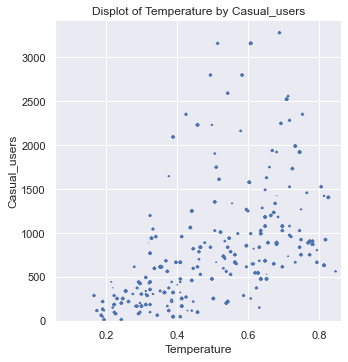

In [7]:
df=load_and_process("../day.csv")
graph_type1(df, 'Temperature', 'Casual_users')

## Observation on the 1st graph:
*This graph shows that higher the temprature, more casual users appear, however, temperature betweem 0.4-0.8 there are number of casual users are appearing*

(731, 18)
Date                731
Season                4
Year                  2
Month                12
Holiday               2
Week_day              7
Working_day           2
Weather               3
Temperature         499
FeelTemp            690
Humidity            595
Wind_speed          650
Casual_users        606
Registered_users    679
Total_users         696
Average_Temp        729
Casual_ratio        729
Registered_ratio    729
dtype: int64


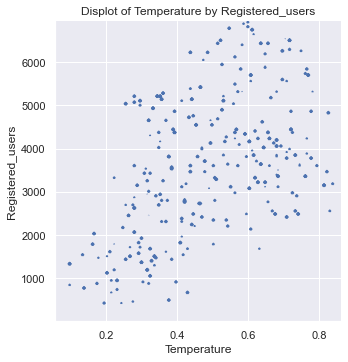

In [8]:
df=load_and_process("../day.csv")
graph_type1(df, 'Temperature', 'Registered_users')

## Observation from graph 2 (Registered users & Temperature)
>*Similar to graph one however we can see Registered users tend to use the bike sharing despite the weather and there are more users appearing densely when temperature is between 0.4-0.8*


In [111]:
def graph_type2 (df, var1, var2, var3):
    
    graph= sns.relplot( data=df, x=var1, y=var2, hue= var3)
    plt.title("Relationship Plot of " + var1 + " by " + var2)

    
    
    


(731, 18)
Date                731
Season                4
Year                  2
Month                12
Holiday               2
Week_day              7
Working_day           2
Weather               3
Temperature         499
FeelTemp            690
Humidity            595
Wind_speed          650
Casual_users        606
Registered_users    679
Total_users         696
Average_Temp        729
Casual_ratio        729
Registered_ratio    729
dtype: int64


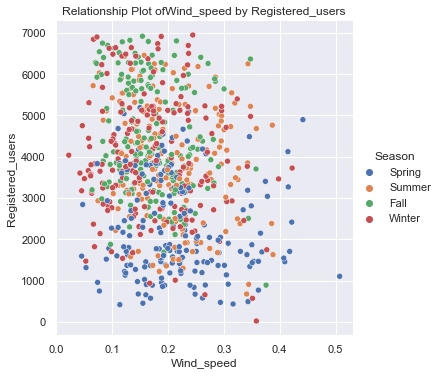

In [112]:
df=load_and_process("../day.csv")
graph_type2(df,'Wind_speed', 'Registered_users', "Season")


## Observation from Graph 3 
>This graph shows the correlation between wind speed and registered users with the factors of seasons*

In [15]:
def graph_type3(df):
    graph4=sns.heatmap(df.corr(), annot=True)

(731, 18)
Date                731
Season                4
Year                  2
Month                12
Holiday               2
Week_day              7
Working_day           2
Weather               3
Temperature         499
FeelTemp            690
Humidity            595
Wind_speed          650
Casual_users        606
Registered_users    679
Total_users         696
Average_Temp        729
Casual_ratio        729
Registered_ratio    729
dtype: int64


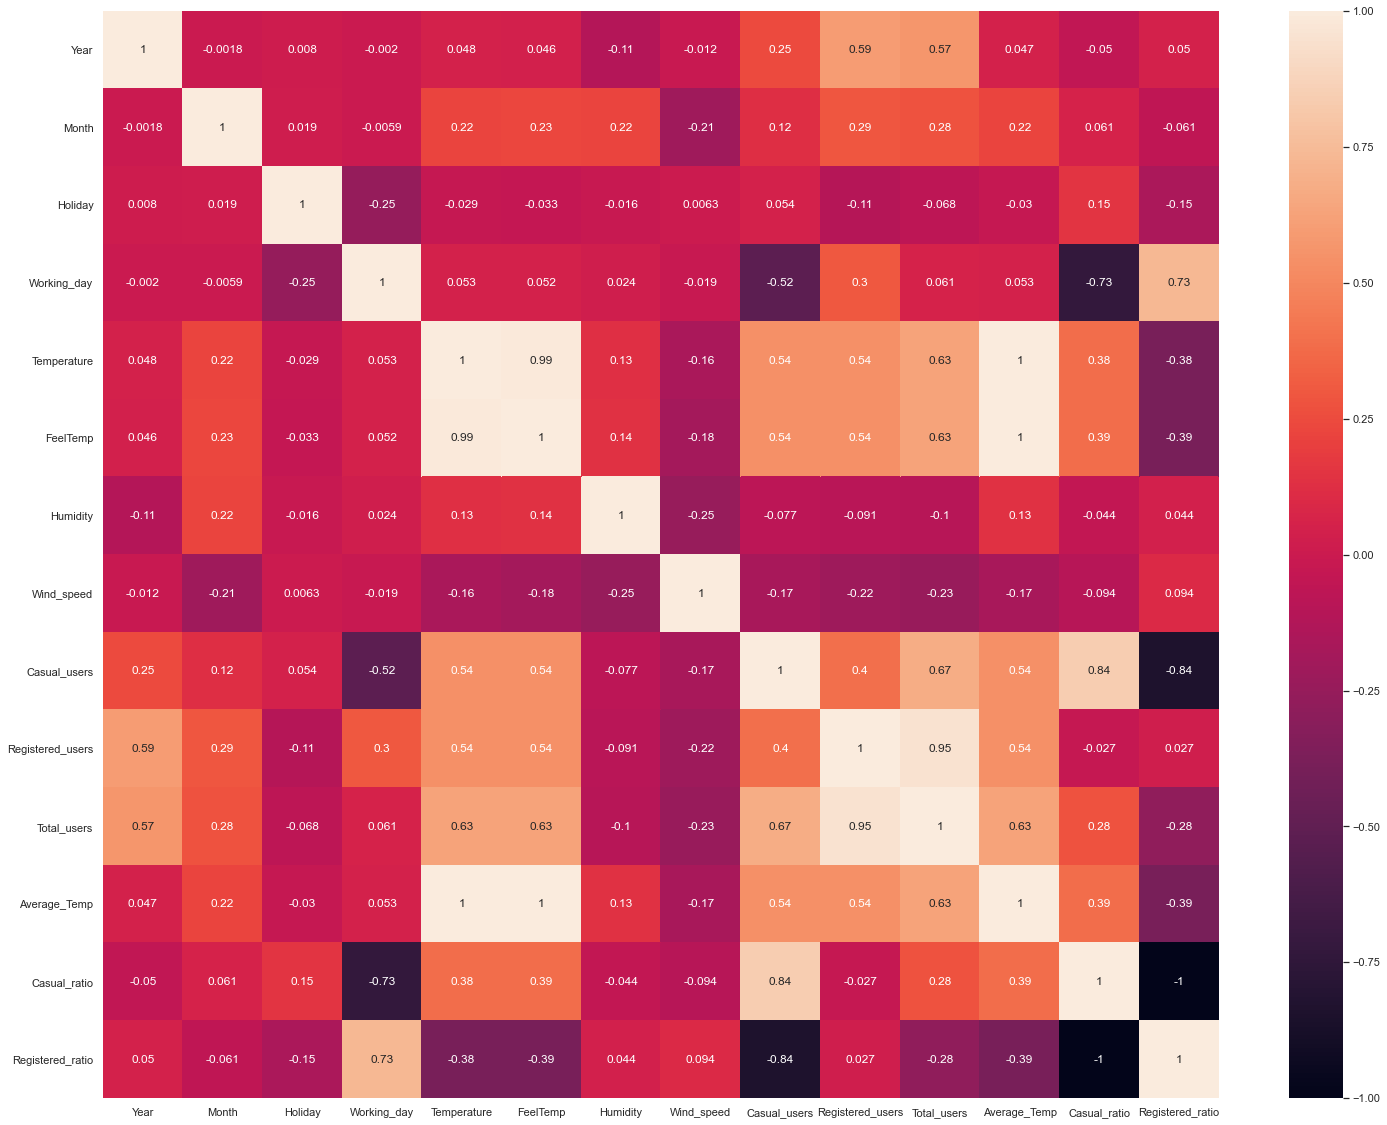

In [16]:
df=load_and_process("../day.csv")
graph_type3(df)


## Observation from Graph 4 (Heat Graph)
>*This graph shows all the possible correlation between all columns*